# Pollution trend analysis

This document uses the [US Air Pollution](https://www.kaggle.com/datasets/mexwell/us-air-pollution).
The goal this analysis is to note the trend of pollution using a trend analysis machine learning model like ARIMA, SARIMA, and ETS.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../datasets/pollution-trend-analysis/uspollution_pollution_us_2000_2016.csv')

In [2]:
df.shape

(1746661, 29)

In [3]:
df.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [4]:
df.groupby('City').size().sort_values(ascending=False)

City
Not in a city         138411
New York               46887
Los Angeles            42241
Phoenix                37912
El Paso                36908
                       ...  
St. Ann                  860
Kenner                   544
Bakersfield              434
Dentsville (Dents)       116
Roosevelt                104
Length: 144, dtype: int64

In [5]:
df_ny = df[df['City'] == 'New York'].reset_index(drop=True)

df_ny['Date Local'] = pd.to_datetime(df_ny['Date Local'])
df_ny = df_ny.groupby('Date Local').mean().reset_index()
df_ny.set_index('Date Local', inplace=True)

last_two_years = df_ny.index.max() - pd.DateOffset(years=2)
df_ny = df_ny[last_two_years:df_ny.index.max()]

df_bkp = df_ny.copy()

In [6]:
def plot(_df, _column):
    plt.figure(figsize=(5, 3))
    plt.plot(_df.index, _df[_column], label=_column)
    plt.xlabel('Data')
    plt.ylabel(f'Concentração de {_column}')
    plt.title(f'Tendência de {_column} Mean ao longo do tempo')
    plt.legend()
    plt.show()

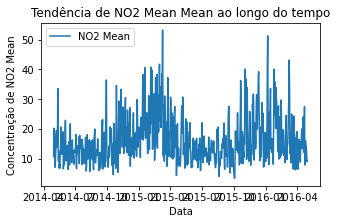

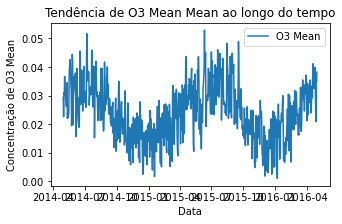

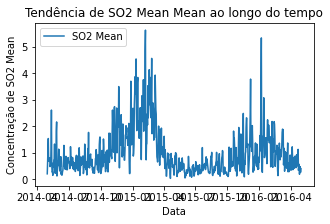

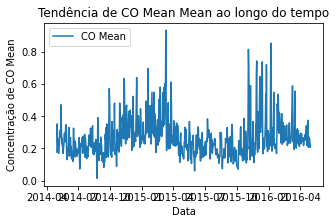

In [7]:
cols = ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']
for c in cols:
    plot(df_ny, c)

In [8]:
df_ny.dtypes

Unnamed: 0           float64
State Code           float64
County Code          float64
Site Num             float64
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour     float64
NO2 AQI              float64
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour      float64
O3 AQI               float64
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour     float64
SO2 AQI              float64
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour      float64
CO AQI               float64
dtype: object

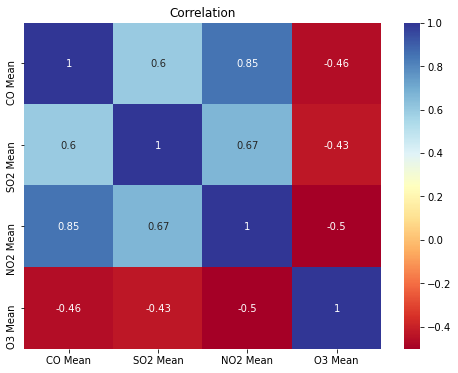

In [9]:
correlation_matrix = df_ny[['CO Mean', 'SO2 Mean', 'NO2 Mean', 'O3 Mean']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Correlation')
plt.show()

In [10]:
arima_models_dict = {}
sarima_models_dict = {}
ets_models_dict = {}

### ARIMA

In [11]:
from pmdarima.arima import auto_arima

df_ny_arima = df_ny.copy()

# Split the data into training (80%) and testing (20%)
train_size = int(len(df_ny_arima) * 0.8)
train, test = df_ny_arima[:train_size], df_ny_arima[train_size:]

for col in cols:
    # Find the best parameters using AutoARIMA
    model = auto_arima(train[col], seasonal=False, trace=True)
    # Fit the model to the training data
    model_fit = model.fit(train[col])
    arima_models_dict[col] = model_fit


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3779.759, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3990.478, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3964.844, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3860.202, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3988.488, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3777.968, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3776.325, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3777.935, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3795.585, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3778.010, Time=0.91 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3774.523, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3858.309, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3776.162, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3776.128, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [12]:
arima_models_dict

{'NO2 Mean': ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'O3 Mean': ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'SO2 Mean': ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'CO Mean': ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True,
       with_intercept=False)}

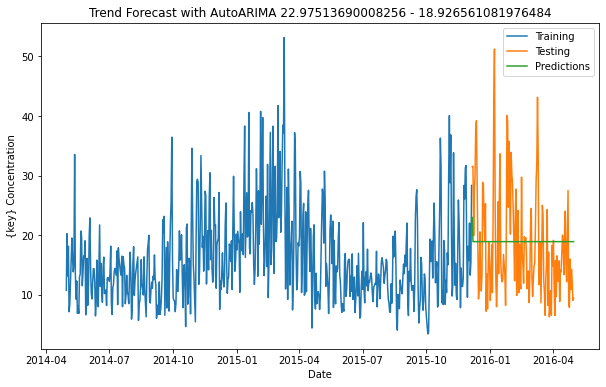

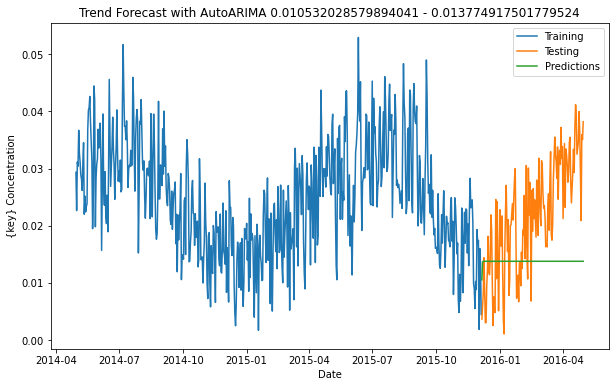

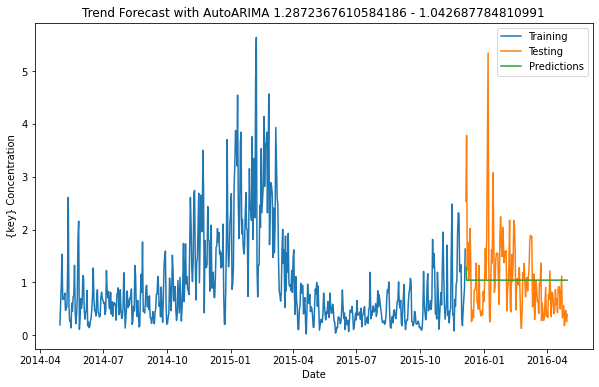

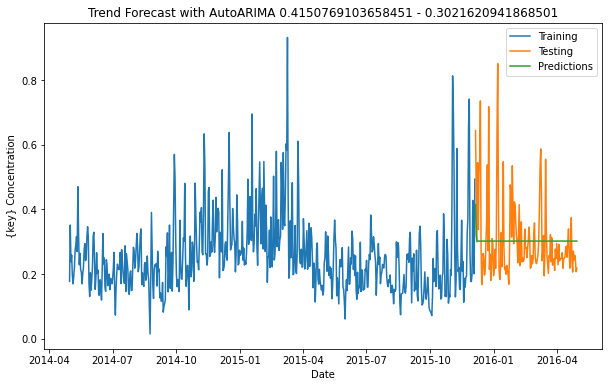

In [13]:
# Plot the results
for key, model in arima_models_dict.items():
    # Make predictions for the test period
    forecast = model.predict(n_periods=len(test))
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train[key], label='Training')
    plt.plot(test.index, test[key], label='Testing')
    plt.plot(test.index, forecast, label='Predictions')
    plt.xlabel('Date')
    plt.ylabel('{key} Concentration')
    plt.title(f'Trend Forecast with AutoARIMA {forecast.iloc[0]} - {forecast.iloc[len(forecast)-1]}')
    plt.legend()
    plt.show()

### SARIMA

In [14]:
df_ny_sarima = df_ny.copy()

import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

train, test = train_test_split(df_ny_sarima, train_size=0.8)

for col in cols:
    # Find the best SARIMA parameters using auto_arima
    model = pm.auto_arima(train[col], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
    # Fit the SARIMA model to the training data with the best parameters
    model.fit(train[col])
    sarima_models_dict[col] = model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3779.434, Time=1.86 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3990.478, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3966.648, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3862.118, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3988.488, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3781.721, Time=1.01 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=3781.716, Time=1.00 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=3780.262, Time=3.45 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=3780.287, Time=3.43 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=3779.759, Time=0.39 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=3781.554, Time=1.84 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=3781.248, Time=1.84 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=3782.271, Time=4.91 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=3777.589, Time=1.29 sec
 ARIMA(1,1,2)(0,0,1

 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=929.425, Time=3.95 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1006.965, Time=3.96 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=929.029, Time=1.76 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=927.310, Time=0.91 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=925.617, Time=0.52 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=927.297, Time=0.66 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=929.263, Time=1.21 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=925.430, Time=0.23 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=927.092, Time=0.47 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=927.079, Time=0.40 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=929.046, Time=1.08 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1000.574, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=925.475, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=931.252, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=927.470, Time=0.58 sec
 ARIMA(0

RMSE: 8.816847128227408
22.761140156915346 - 18.782511126893397


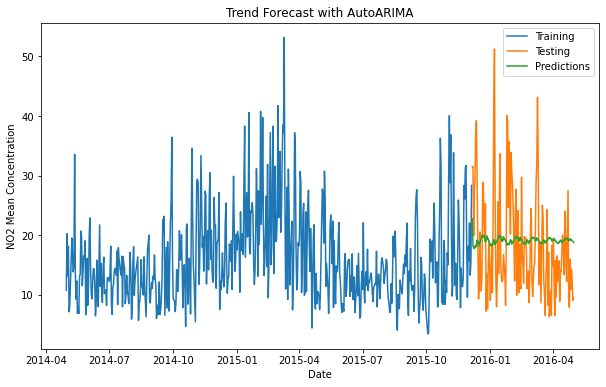

RMSE: 0.012275156886457727
0.011398406961441357 - 0.014054333511977121


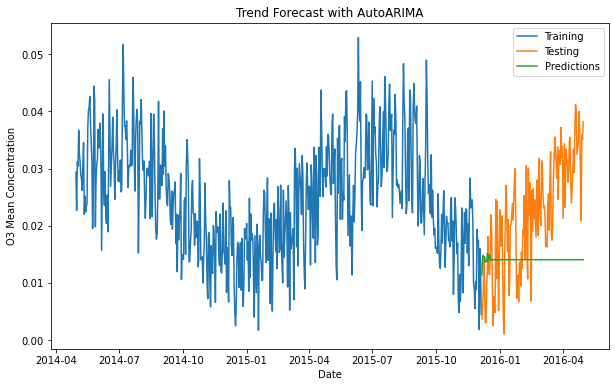

RMSE: 0.7268089245952535
1.2872367610584186 - 1.042687784810991


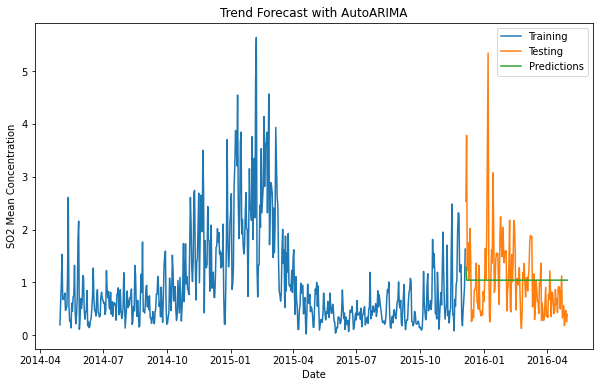

RMSE: 0.1169862581168142
0.4150769103658451 - 0.3021620941868501


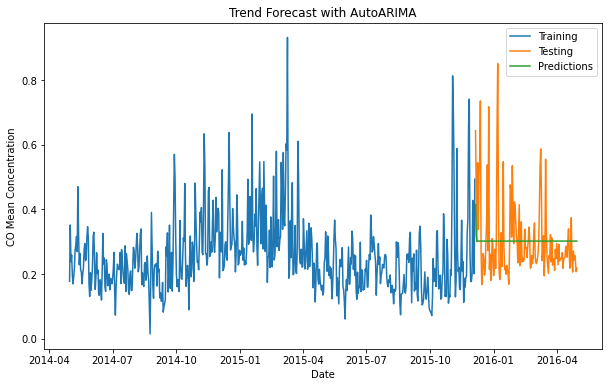

In [15]:
for key, model in sarima_models_dict.items():
    # Make predictions with the fitted model
    forecast = model.predict(len(test))
    # Calculate the Root Mean Squared Error (RMSE) of the predictions
    rmse = np.sqrt(mean_squared_error(test[key], forecast))
    print(f'RMSE: {rmse}')
    print(f'{forecast.iloc[0]} - {forecast.iloc[len(forecast)-1]}')
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train[key], label='Training')
    plt.plot(test.index, test[key], label='Testing')
    plt.plot(test.index, forecast, label='Predictions')
    plt.xlabel('Date')
    plt.ylabel(f'{key} Concentration')
    plt.title('Trend Forecast with AutoARIMA')
    plt.legend()
    plt.show()

### ETS

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df_ny_ets = df_ny.copy()

df_ny_ets = df_ny_ets.asfreq('D')

for col in cols:
    # Fit the ETS model to the data
    model = ExponentialSmoothing(df_ny_ets[col], seasonal='add', trend='add', seasonal_periods=12)
    result = model.fit()
    ets_models_dict[col] = result

In [17]:
ets_models_dict

{'NO2 Mean': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x7fd9552998e0>,
 'O3 Mean': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x7fd94f6ede80>,
 'SO2 Mean': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x7fd94f341070>,
 'CO Mean': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x7fd94f341250>}

14.82212559549436 - 13.6197844853201


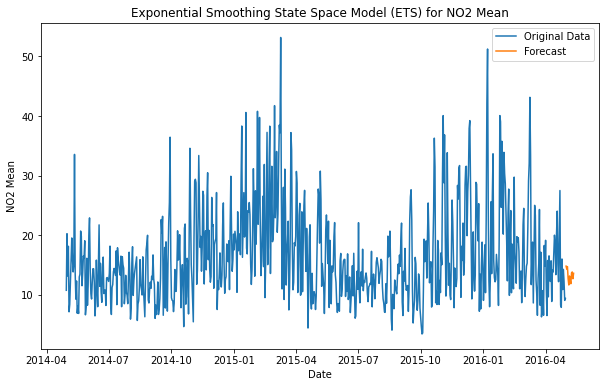

0.03285958403348098 - 0.035379198021815036


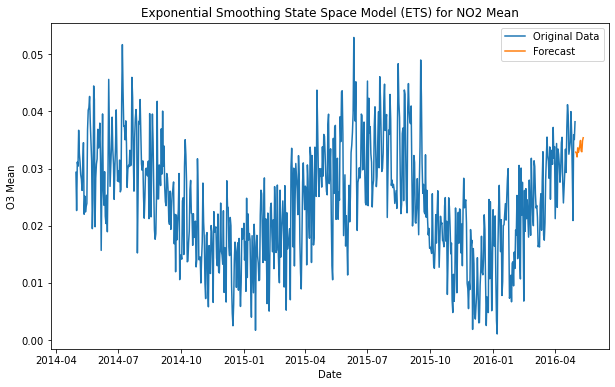

0.5225668065620693 - 0.44384586196164544


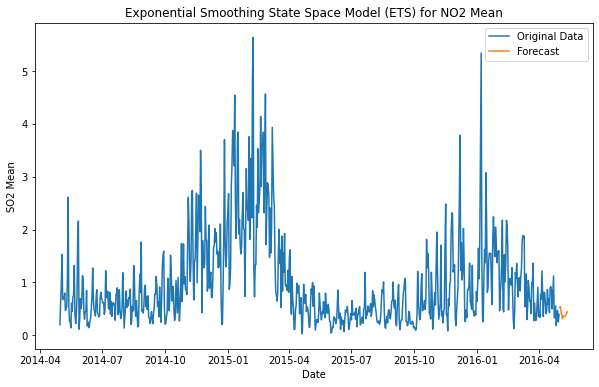

0.2581535506805742 - 0.24240969520517908


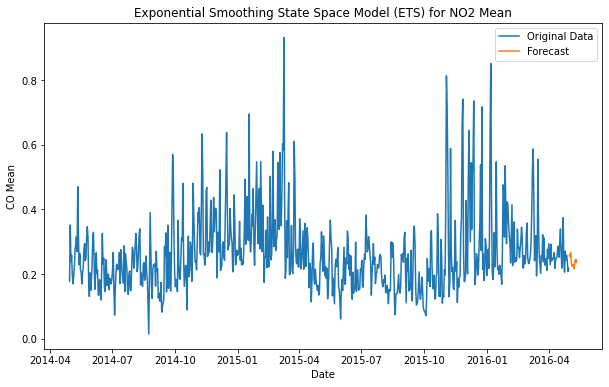

In [18]:
for key, model in ets_models_dict.items():
    # Make predictions with the fitted model
    forecast = model.forecast(steps=12)
    # Plot the original data and the forecasts
    print(f'{forecast.iloc[0]} - {forecast.iloc[len(forecast)-1]}')
    plt.figure(figsize=(10, 6))
    plt.plot(df_ny_ets.index, df_ny_ets[key], label='Original Data')
    plt.plot(forecast.index, forecast, label='Forecast')
    plt.xlabel('Date')
    plt.ylabel(key)
    plt.title('Exponential Smoothing State Space Model (ETS) for NO2 Mean')
    plt.legend()
    plt.show()

In [19]:
import joblib

for model_name, model in arima_models_dict.items():
    joblib.dump(model, f'{model_name}-ARIMA-pollution-trend-analysis-model.joblib')

for model_name, model in sarima_models_dict.items():
    joblib.dump(model, f'{model_name}-SARIMA-pollution-trend-analysis-model.joblib')
    
for model_name, model in ets_models_dict.items():
    joblib.dump(model, f'{model_name}-ETS-pollution-trend-analysis-model.joblib')
    

In [20]:
print(joblib.__version__)

1.2.0


In [28]:
import json

results_dict = {}

for key, model in ets_models_dict.items():
    forecast = model.forecast(steps=24)
    results_dict[key] = forecast.tolist()

result_json = json.dumps(results_dict)

print(result_json)

{"NO2 Mean": [14.82212559549436, 14.311754960918147, 14.739735715741967, 12.720941904630715, 11.65929374852305, 13.16741138705186, 12.462819433695223, 11.868107840710096, 13.691995796081336, 13.840983687850041, 12.698022985182192, 13.6197844853201, 14.810852908333523, 14.30048227375731, 14.72846302858113, 12.70966921746988, 11.648021061362215, 13.156138699891025, 12.451546746534387, 11.856835153549259, 13.6807231089205, 13.829711000689205, 12.686750298021355, 13.608511798159265], "O3 Mean": [0.03285958403348098, 0.0327011960389166, 0.032026427982482876, 0.033609796963458644, 0.03282432771775832, 0.03333248944032671, 0.034006883509279565, 0.03490474103116435, 0.03306473108219696, 0.03292906761098306, 0.03486023520529261, 0.035379198021815036, 0.032934495599189866, 0.03277610760462549, 0.03210133954819176, 0.03368470852916753, 0.032899239283467205, 0.0334074010060356, 0.03408179507498845, 0.03497965259687324, 0.033139642647905844, 0.03300397917669195, 0.0349351467710015, 0.03545410958752

In [3]:
df

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN
